# Formulating the Question
We moeten een binary-calsification maken terwijl de data meerdere opties geeft (setosa, versicolor en verginica), hierom kiezen we er voor om er een ja/nee vraag van te maken.
We kiezen Iris-setoas als target(Is de entry een setosa of niet?).

# Finding and Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Importing the dataset
iris = pd.read_csv("Iris_with_outliers.csv")
iris.describe()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,173.000000,173.000000,170.000000,172.000000,169.000000,171.000000
mean,86.000000,86.000000,5.834118,3.068605,3.718935,1.171345
std,50.084928,50.084928,0.844972,0.444922,1.778207,0.763774
min,0.000000,0.000000,4.300000,2.000000,1.000000,0.100000
25%,43.000000,43.000000,5.100000,2.800000,1.500000,0.300000
50%,86.000000,86.000000,5.800000,3.000000,4.300000,1.300000
75%,129.000000,129.000000,6.400000,3.400000,5.100000,1.800000
max,172.000000,172.000000,8.000000,4.400000,6.900000,2.500000


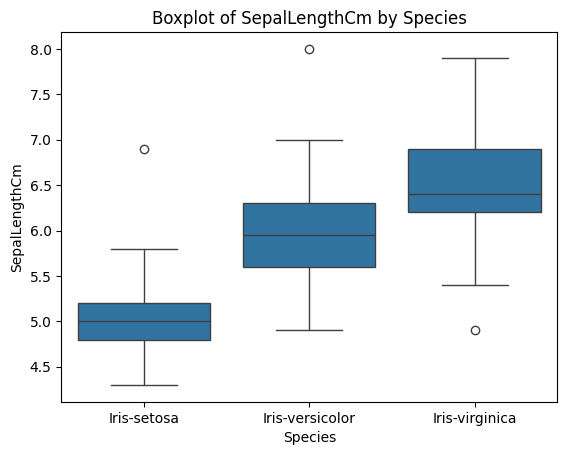

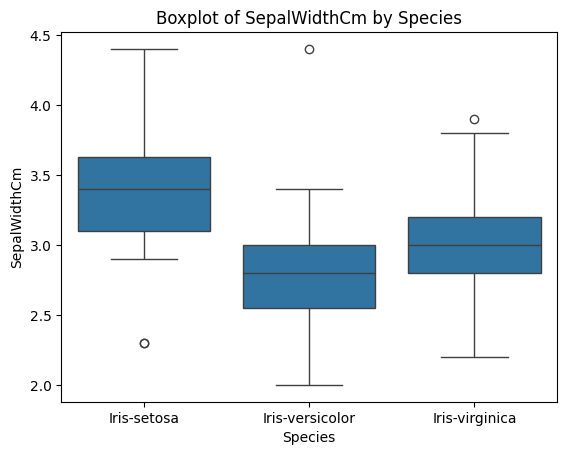

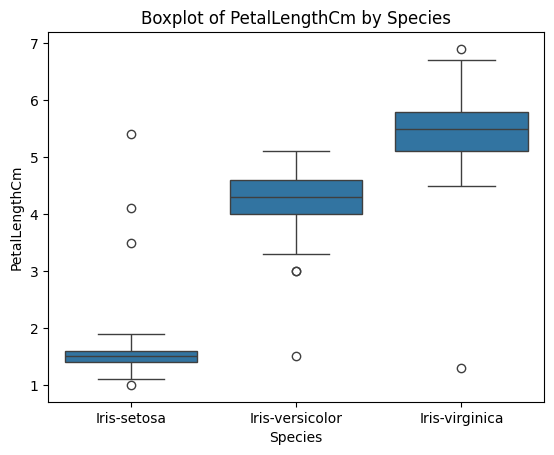

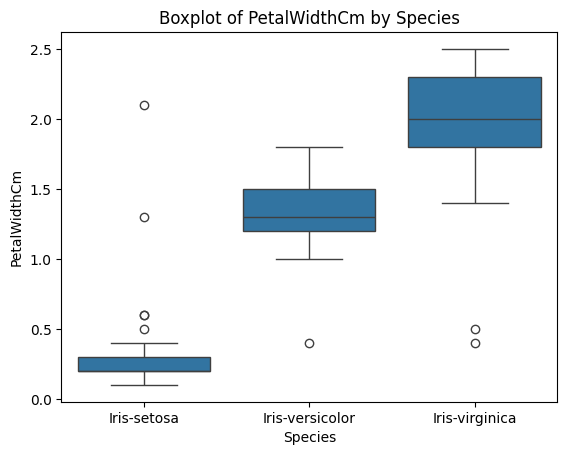

In [2]:
# boxplotting each feature in the dataset
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    sns.boxplot(x = 'Species', y = feature, data = iris)
    plt.title('Boxplot of ' + feature + ' by Species')
    plt.show()

Uit al deze boxplots is te zien dat er best veel outliers zijn binne onze dataset. Hierdoor raakt de data geskewed omdat het gemiddelde niet juist is. Dit zou impact kunnen hebben op de resultaten van ons model.

# Cleaning the data and Feature Engineering

In [3]:
# Removing null values
iris = iris.dropna()

# Splitting the dataset into the Training set and Test set
y = iris['Species']
X = iris.drop(['Species', 'Id', iris.columns[0]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Hier halen we de kolommen `Id` en de eerste kolom eruit. Deze data voegt geen waarde toe aan onze data set en waarop wij testen.
Ook splitsen wij de data in train en test data voor ons model.

Er zijn niet echt genoeg features in deze data set om gebruik te maken van feature engineering, aangezien alle features belangrijk zijn.

# Choosing a Model

In [4]:
# Initialize the model
logreg= LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy*100, "%")


The accuracy of the model is:  96.96969696969697 %


We hebben gekozen voor logistic regression voor ons binairy classificatie probleem. LR is effecient met onze dataset, omdat de dataset relatief klein is.

# Tuning and Evaluating

Het model voorspelt erg goed. tussen de 0 en 2 fouten consistently. We kunnen niet heel erg veel veranderen aan ons model. Het enige wat we kunnen doen, is de outliers aanpassen in onze dataset, en het model opnieuw trainen

In [5]:
# Define the features and species
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Prepare a list to hold the outlier indices
outlier_indices = []

# Loop over each species
for spec in species:
    # Subset the data for the current species
    iris_spec = iris[iris['Species'] == spec]

    # Loop over each feature
    for feature in features:
        # Calculate the IQR
        Q1 = iris_spec[feature].quantile(0.25)
        Q3 = iris_spec[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define the acceptable range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        print(spec, feature, lower_bound, upper_bound)

        # Identify the outliers
        outliers = iris_spec[(iris_spec[feature] < lower_bound) | (iris_spec[feature] > upper_bound)]

        # Add the outlier indices to the list
        outlier_indices.extend(outliers.index)


# Remove the outliers from the original DataFrame
iris = iris.drop(set(outlier_indices))

## Replace the species names with 1 and 0
iris['Species'] = iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [1, 0, 0])



Iris-setosa SepalLengthCm 4.199999999999999 5.800000000000001
Iris-setosa SepalWidthCm 2.4250000000000007 4.225
Iris-setosa PetalLengthCm 1.0999999999999996 1.9000000000000004
Iris-setosa PetalWidthCm 0.050000000000000044 0.44999999999999996
Iris-versicolor SepalLengthCm 4.549999999999999 7.35
Iris-versicolor SepalWidthCm 1.75 3.75
Iris-versicolor PetalLengthCm 3.0375000000000005 5.537499999999999
Iris-versicolor PetalWidthCm 0.7499999999999999 1.9500000000000002
Iris-virginica SepalLengthCm 5.15 7.950000000000001
Iris-virginica SepalWidthCm 2.1999999999999993 3.8000000000000007
Iris-virginica PetalLengthCm 4.012499999999999 6.912500000000001
Iris-virginica PetalWidthCm 1.0500000000000003 3.0499999999999994


C:\Users\LarsV\AppData\Local\Temp\ipykernel_13220\2078053896.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['Species'] = iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [1, 0, 0])


**Logistic Regression**

Logistiche regressie is een statistische methode voor het voorspellen of iets een van twee categorieën is, zoals "ja" of "nee", "spam" of "geen spam". 

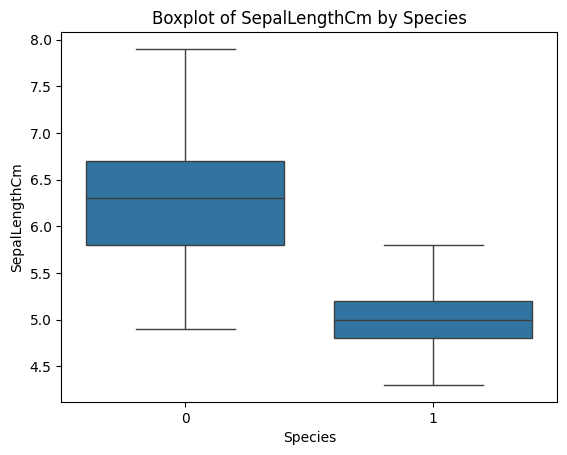

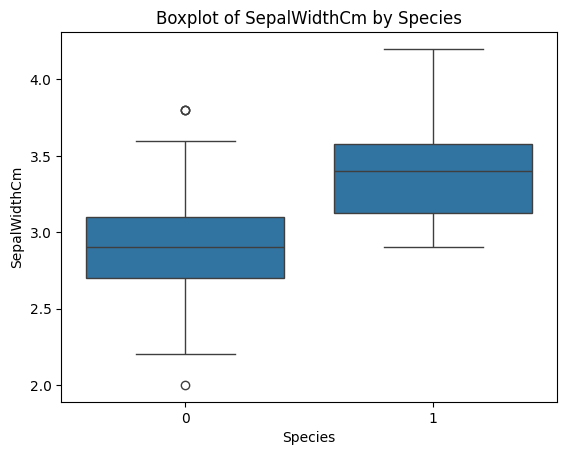

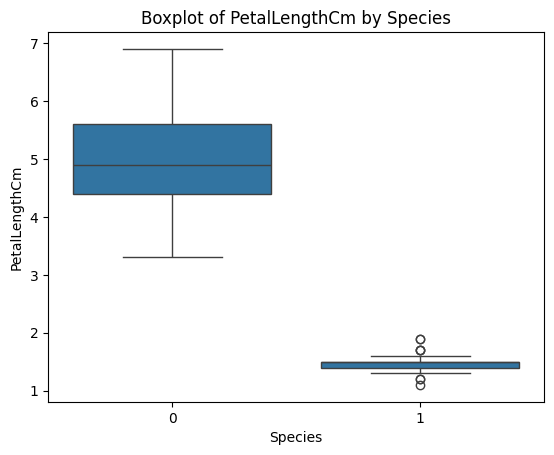

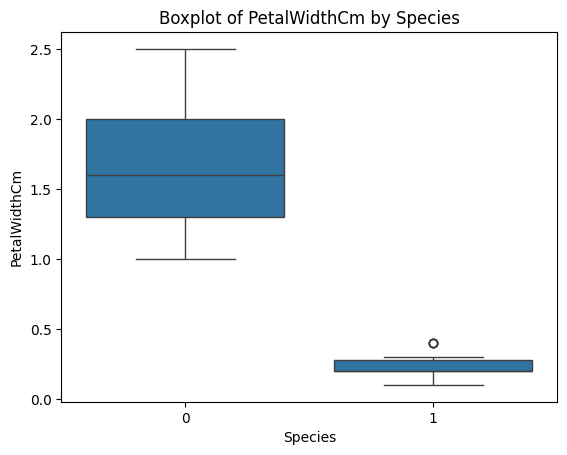

In [6]:
# Boxplotting the features after removing the outliers
eatures = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    sns.boxplot(x = 'Species', y = feature, data = iris)
    plt.title('Boxplot of ' + feature + ' by Species')
    plt.show()

We hebben de data opnieuw geplot, en het valt op dat de outliers niet verwijderd zijn. Dit betekend dat de outliers niet extreem genoeg waren. Dit zouden we kunnen aanpassen door de multiplier van de `upperbound` en `lowerbound` te verlagen.

# Using the Model and Presenting Results

In [7]:
# Splitting the dataset into the Training set and Test set
y = iris['Species']
X = iris.drop(['Species', 'Id', iris.columns[0]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Initialize the model
logreg= LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy*100, "%")


The accuracy of the model is:  100.0 %


Nu dat de outliers 'verwijderd' zijn, is er eigenlijk niks veranderd aan het resultaat. Het model heeft alsnog een accuratie van 93%-100%, dus ongeveer 0-2 fouten.

# K-Means Clustering 

##### K-Means Clustering

K-Means is een algoritme voor ongecontroleerd leren dat wordt gebruikt om gegevens in verschillende groepen of clusters te classificeren. Het doel is om de gegevens zo te organiseren dat items in hetzelfde cluster meer op elkaar lijken dan items in verschillende clusters.

Het algoritme werkt door eerst willekeurige "centroïden" te kiezen. Elk datapunt wordt vervolgens toegewezen aan het dichtstbijzijnde centroïde, en die clusters worden bijgewerkt om het middelpunt (of de "gemiddelde") positie van alle datapunten in het cluster te zijn. Dit proces wordt herhaald totdat de clusters niet meer significant veranderen.

##### Ongecontroleerd leren

Ongecontroleerd leren is een type machine learning waarbij het model patronen in de gegevens leert zonder dat er labels beschikbaar zijn. Dit is anders dan gecontroleerd leren, waarbij elk datapunt een bijbehorend label of doel heeft.

Bij ongecontroleerd leren is het doel om de onderliggende structuur of distributie in de gegevens te ontdekken. Dit kan betekenen het vinden van clusters van vergelijkbare datapunten (zoals bij K-Means), het vinden van anomalieën of outliers, of het leren van de onderliggende verdeling van de gegevens.

In [8]:
# Import 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

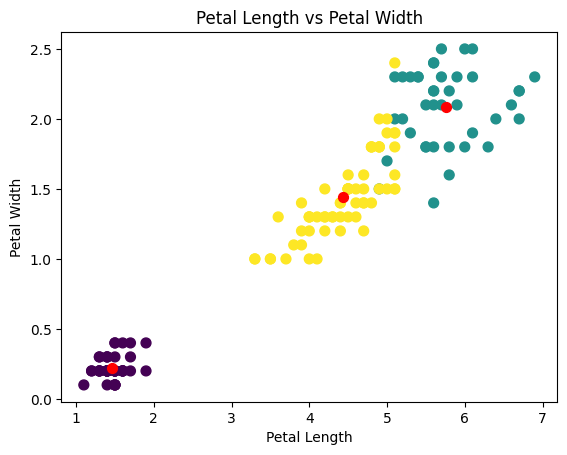

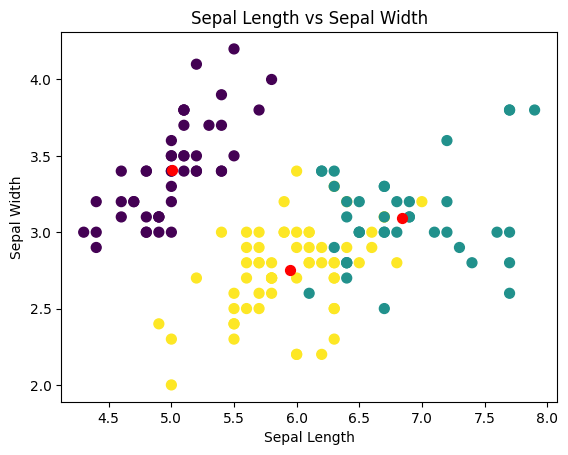

In [9]:
#K means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Getting the values of the centroids
centroids = kmeans.cluster_centers_

# Plotting the data points and centroids
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c= kmeans.labels_.astype(float), s=50, alpha=1)
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=50)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Plotting the data points and centroids
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], c= kmeans.labels_.astype(float), s=50, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


# Extra: Guassian Mixture

In [10]:
# Import 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [11]:
from sklearn.decomposition import PCA  # 1. choose model class
model = PCA(n_components=2)            # 2. instantiate model
model.fit(X)                      # 3. fit model to data
X_2D = model.transform(X)               # 4. determine labels

     Unnamed: 0   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
0             0    0            5.1           3.5            1.4   
1             1    1            4.7           3.2            1.6   
2             2    2            4.9           3.1            1.5   
3             3    3            4.4           2.9            1.4   
4             4    4            5.0           3.4            1.5   
..          ...  ...            ...           ...            ...   
167         167  167            5.7           2.5            5.0   
168         168  168            6.8           3.0            5.5   
169         169  169            6.4           2.7            5.3   
170         170  170            7.2           3.6            6.1   
171         171  171            6.3           3.3            6.0   

     PetalWidthCm  Species      PCA1      PCA2  
0             0.2        1 -2.809468  0.338668  
1             0.2        1 -2.761982 -0.177276  
2             0.1        1 -2.803626

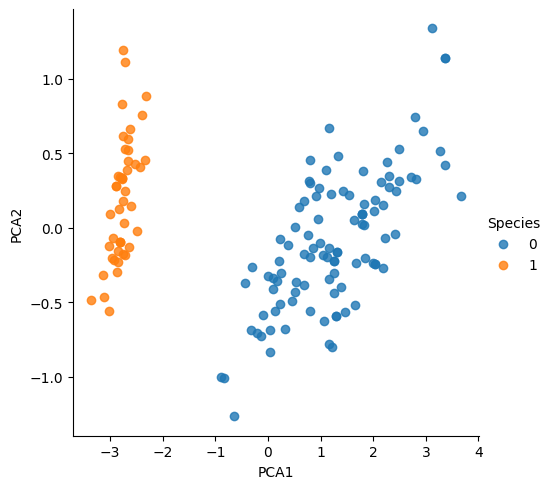

In [12]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
print(iris)
sns.lmplot(x="PCA1", y="PCA2", hue='Species', data=iris, fit_reg=False)

In [13]:
from sklearn.mixture import GaussianMixture      # 1. choose model class
model = GaussianMixture(n_components=3,
                                 covariance_type='full')  # 2. instantiate model
model.fit(X)                                # 3. fit model to data
y_gmm = model.predict(X)   

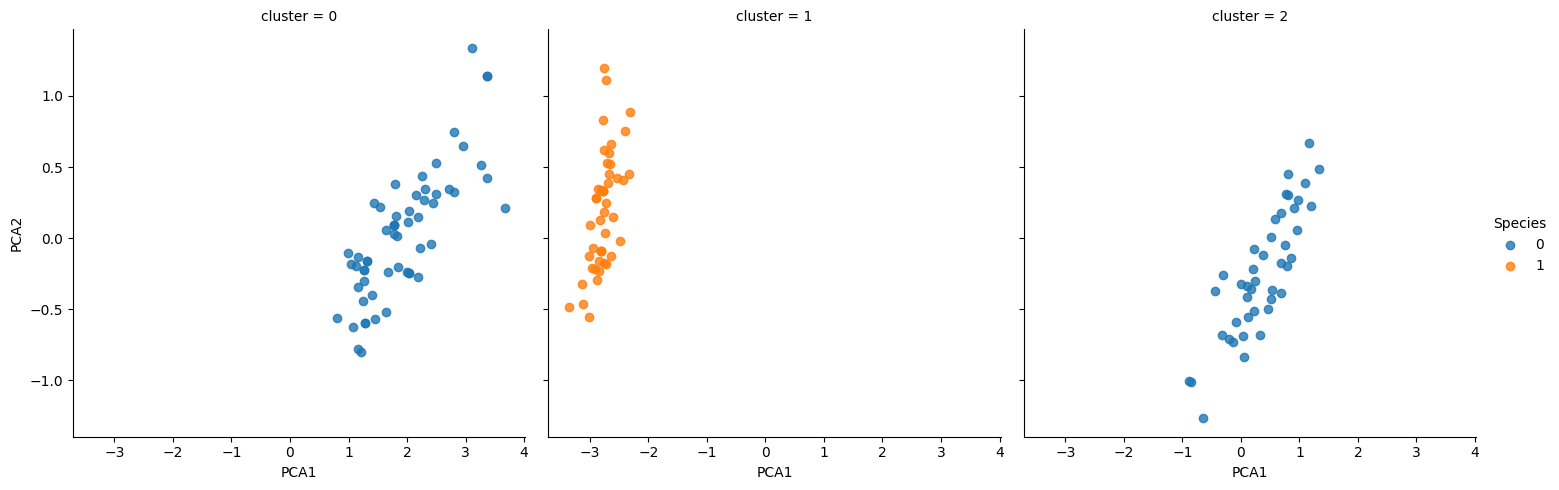

In [14]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='Species',
        col='cluster', fit_reg=False);

# Linear Regression

Lineaire regressie is een statistische methode die wordt gebruikt om de relatie tussen twee continue variabelen te onderzoeken. Het doel is om een lineaire benadering te vinden van de relatie tussen de afhankelijke variabele (de variabele die we willen voorspellen) en één of meer onafhankelijke variabelen (de variabelen die we gebruiken om de voorspelling te maken).

Het basisidee van lineaire regressie is als volgt: we proberen een rechte lijn te vinden die het beste past bij de gegevenspunten in een scatterplot. Deze lijn wordt de regressielijn genoemd en wordt zo gekozen dat de som van de kwadraten van de verticale afstanden van de gegevenspunten tot de lijn (de zogenaamde residuen) zo klein mogelijk is. Dit wordt de methode van de kleinste kwadraten genoemd.

Lineaire regressie kan nuttig zijn in vele situaties. Bijvoorbeeld, het kan worden gebruikt om te voorspellen hoeveel een bedrijf zal verkopen op basis van de hoeveelheid geld die het uitgeeft aan reclame, of om te voorspellen hoeveel een huis zal kosten op basis van de grootte en de locatie.

### Wat is het probleem / doel
Wij willen kijken of er een relatie is tussen bepaalde kenmerken van de Iris bloem. We gaan hier de `PetalWidthCm` van de Iris bloemen voorspellen op basis van de `PetalLengthCm`.

Wel is het op te merken dat Linear Regressie waarschijnlijk niet geschikt is voor onze data.



R^2 Score: -0.8402230080421677


Text(0, 0.5, 'PetalWidthCm')

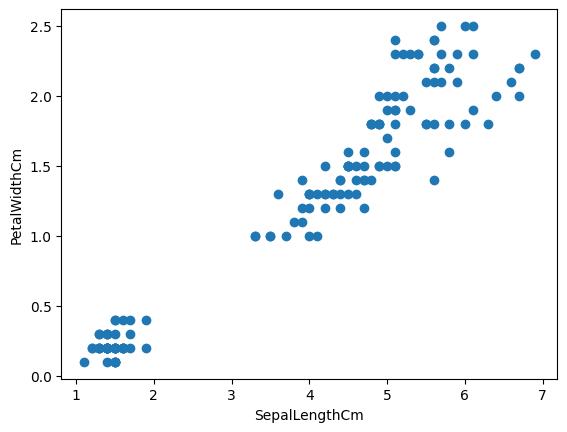

In [15]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

X = iris[['PetalLengthCm']]

# Definieer de target variabele die we willen voorspellen
y = iris['PetalWidthCm']

# Bereken en print de R^2 score van het model op de testdata
print("R^2 Score:", model.score(X_test, y_test))

# Scatter plot van de originele data
plt.scatter(X['PetalLengthCm'], y)

# Voeg labels toe aan de assen en toon de plot
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')

### Model trainen
In onze vorige opdrachten hebben wij de data al opgeschoont en klaar gemaakt voor een model. Dus nu beginnen we gelijk met het trainen van het model.

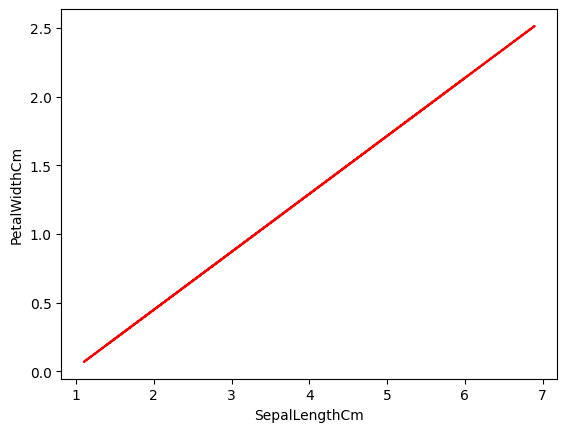

In [16]:

# Split de dataset in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creëer een Linear Regression model en train het op de trainingsdata
model = LinearRegression()
model.fit(X_train, y_train)

# Maak voorspellingen op de testdata
predict = model.predict(X_test)

# Fit een lineaire regressielijn op de originele data
m, b = np.polyfit(X['PetalLengthCm'], y, 1)

# Plot de lineaire regressielijn op de originele data in rood
plt.plot(X['PetalLengthCm'], m*X['PetalLengthCm'] + b, color='red')

# Voeg labels toe aan de assen en toon de plot
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

### Conclusie

Uit onze grafiek is af te leiden dat er een *relatie* is tussen de lengte en breedte van een bloem blad. Dit wordt ondersteunt door de R^2 score, 93% is een relatief lage score, maar dit toont wel dat er wel enige relatie is.

Het is belangrijk op te merken dat hoewel het model een significante relatie aantoont, dit niet noodzakelijkerwijs betekent dat de lengte van de bloemblaadjes de breedte ervan veroorzaakt. Andere factoren die niet in het model zijn opgenomen, kunnen ook een rol spelen.

Zoals we eerder zeiden, is Linear Regressie een simplitische benadering en dat de relatie tussen onze feature in de werkelijkheid complexer zijn.

### Verbeteren van model

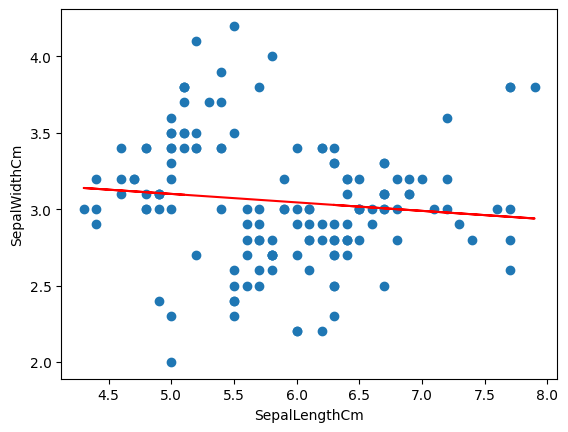

In [17]:
# Linear regression on the Sepal Length and Sepal Width features
X = iris[['SepalLengthCm']]
y = iris['SepalWidthCm']

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predicting the Test set results
predict = model.predict(X_test)

# Scatter plot of the original data
plt.scatter(X['SepalLengthCm'], y)

# Fit a linear regression line to the original data
m, b = np.polyfit(X['SepalLengthCm'], y, 1)
plt.plot(X['SepalLengthCm'], m*X['SepalLengthCm'] + b, color='red')

# Add labels to the axes and show the plot
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()


### Conclusie 2

Hier voeren we weer linear regressie uit op de Iris data set, maar nu op de features `SepalLenghtCm` en `SepalWidthCm`

Hier kan je zien dat de regressie lijn bijna horizontaal is. Een bijna horizontale lijn in een lineaire regressieanalyse betekent dat er weinig tot geen relatie is tussen de onafhankelijke variabele `SepalLengthCm` en de afhankelijke variabele `SepalWidthCm`.

In andere woorden, veranderingen in 'SepalLengthCm' hebben weinig tot geen effect op 'SepalWidthCm'. Dit betekent dat de lengte van de kelkbladen (sepalen) van de Iris bloemen geen goede voorspeller is voor de breedte van de kelkbladen volgens het huidige model.



# Multi-class classification

Multi-class classificatie is een type van machine learning probleem waarbij een model getraind wordt om een van meer dan twee klassen te voorspellen. Dit is in tegenstelling tot binaire classificatie, waar het model slechts twee mogelijke klassen moet voorspellen.

Er zijn verschillende technieken om multi-class classificatieproblemen aan te pakken. Een veelgebruikte techniek is de one-vs-all (of one-vs-rest) strategie, waarbij voor elke klasse een apart binaire classificatiemodel wordt getraind dat die klasse onderscheidt van alle andere klassen. Een andere techniek is de one-vs-one strategie, waarbij voor elk paar klassen een apart binaire classificatiemodel wordt getraind.

In de context van de Iris dataset, zou je een multi-class classificatiemodel kunnen trainen om de soort van een Iris bloem te voorspellen op basis van de kenmerken van de bloem (zoals de lengte en breedte van de bloemblaadjes en kelkblaadjes). De Iris dataset bevat drie soorten Iris bloemen (setosa, versicolor, en virginica), dus dit zou een multi-class classificatieprobleem zijn.


### Data voorbereiden
In onze vorige modellen, hadden we binary classification, en dus de data aangepast zodat er 2 klassen waren, setose en de rest. Nu moeten we de data opnieuw importeren en anders voorbereiden.

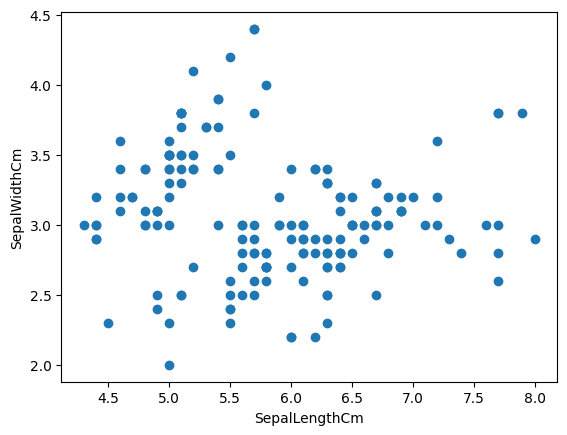

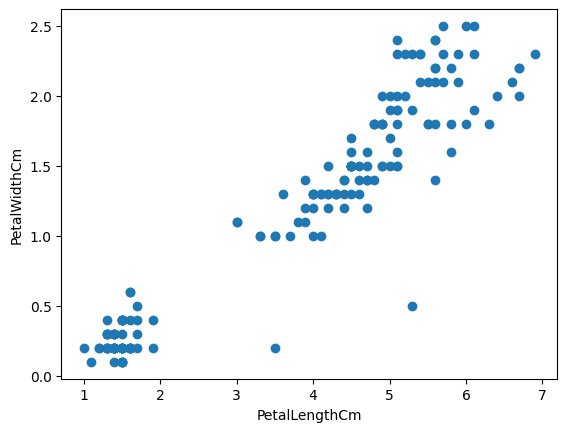

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,173.000000,173.000000,170.000000,172.000000,169.000000,171.000000
mean,86.000000,86.000000,5.834118,3.068605,3.718935,1.171345
std,50.084928,50.084928,0.844972,0.444922,1.778207,0.763774
min,0.000000,0.000000,4.300000,2.000000,1.000000,0.100000
25%,43.000000,43.000000,5.100000,2.800000,1.500000,0.300000
50%,86.000000,86.000000,5.800000,3.000000,4.300000,1.300000
75%,129.000000,129.000000,6.400000,3.400000,5.100000,1.800000
max,172.000000,172.000000,8.000000,4.400000,6.900000,2.500000


In [18]:
# Importing dataset
iris = pd.read_csv("Iris_with_outliers.csv")
iris.describe()

# Scatter plot of the original data
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

iris.describe()


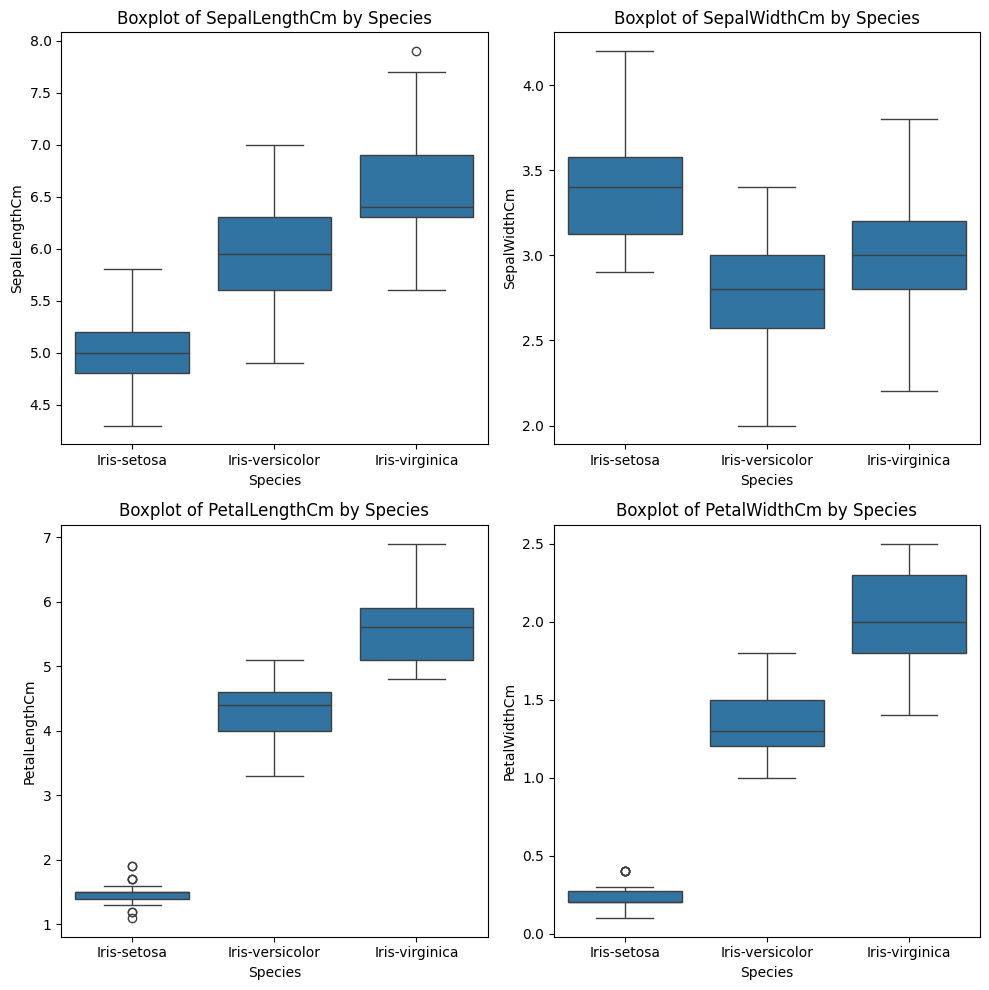

In [19]:
# Cleaning the data
iris = iris.dropna()
iris.drop(columns=['Unnamed: 0'], inplace=True)

# Define the features and species
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Prepare a list to hold the outlier indices
outlier_indices = []

# Loop over each species
for spec in species:
    # Subset the data for the current species
    iris_spec = iris[iris['Species'] == spec]

    # Loop over each feature
    for feature in features:
        # Calculate the IQR
        Q1 = iris_spec[feature].quantile(0.25)
        Q3 = iris_spec[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define the acceptable range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify the outliers
        outliers = iris_spec[(iris_spec[feature] < lower_bound) | (iris_spec[feature] > upper_bound)]

        # Add the outlier indices to the list
        outlier_indices.extend(outliers.index)


# Remove the outliers from the original DataFrame
iris = iris.drop(set(outlier_indices))

# Boxplotting the features after removing the outliers
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, feature in zip(axs.flatten(), features):
    sns.boxplot(x='Species', y=feature, data=iris, ax=ax)
    ax.set_title('Boxplot of ' + feature + ' by Species')

plt.tight_layout()
plt.show()


In [64]:
# Multi-class classification One vs One
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

# Splitting the dataset into the Training set and Test set
y = iris['Species']
X = iris.drop(['Species', 'Id', iris.columns[0]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Initialize the model
model = OneVsOneClassifier(LinearSVC(random_state=0, max_iter=10000, dual=True)) # max_iter=10000, dual=True om warning te voorkomen

# Fit the model
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy*100, "%")


The accuracy of the model is:  100.0 %


<Axes: >

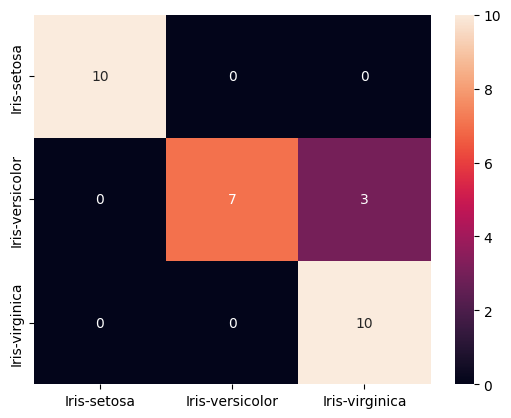

In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# add labels to the confusion matrix
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.heatmap(cm, annot=True, fmt="d", xticklabels=species, yticklabels=species)


# Analyse
Het model heeft een accuracy tussen de 90-100%. Dit is redelijk goed, maar niet heel erg betrouwbaar, omdat het niet een constant goede voorspelling maakt.

In de confusion matrix zie je dat het model vooral fouten maakt tussen de Iris-versiclor en Iris-verginica. Als je terug kijkt naar de visualisatie van de data, kan je ook zien op de scatterplot dat deze 2 bloemen erg op elkaar lijken qua bloem breedte en lengte. Het is dus duidelijk dat het model daarmee moeite heeft.

# Verbeteren van het model
Nu gaan we One vs Rest gebruiken, om te kijken of dat een verschil maakt in de prestatie van het model

In [89]:
# Multi-class classification One vs Rest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

# Splitting the dataset into the Training set and Test set
y = iris['Species']
X = iris.drop(['Species', 'Id', iris.columns[0]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Initialize the model
model = OneVsRestClassifier(LinearSVC(random_state=0, max_iter=10000, dual=True)) # max_iter=10000, dual=True omdat het een error gaf

# Fit the model
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy*100, "%")

The accuracy of the model is:  96.66666666666667 %


<Axes: >

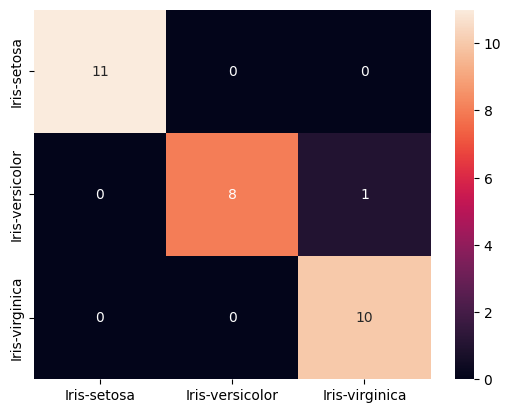

In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# add labels to the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", xticklabels=species, yticklabels=species)

Het model is een beetje inconsistent, meestal heeft hij tussen de 0-2 fout maar soms schite het naar 4-5 fout. Ik denk dat het vooral komt door de kleine dataset en versicolor en virginica erg op elkaar lijken.